<a href="https://colab.research.google.com/github/RajeeveTD007/AVIT-july-2025/blob/main/MLP_Backprop_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-in-csv


Load the MNIST data easily with Keras

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape for MLP (flatten 28x28 to 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Implementing Backpropagation for a Simple MLP (from Scratch)
Here's a basic outline for how to build a simple MLP (input layer → hidden layer → output layer) and implement backprop:

Step 1. Initialize Network Parameters
Randomly initialize weights and biases for each layer.

Step 2. Forward Pass
Pass input data through layers, calculating outputs with activation functions like sigmoid or ReLU.

Step 3. Compute Loss
Compare predicted output with the true label (use a loss function like mean squared error or cross-entropy).

Step 4. Backward Pass (Backpropagation)
Calculate gradients of the loss with respect to weights and biases by applying the chain rule.

Update weights by subtracting a small fraction (learning rate × gradient).

Step 5. Training Loop
For each epoch, repeat the forward and backward passes over the dataset and update weights.

**5. Building an MLP with a Deep Learning Framework (Keras Example)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8770 - loss: 0.4237 - val_accuracy: 0.9612 - val_loss: 0.1322
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9662 - loss: 0.1124 - val_accuracy: 0.9682 - val_loss: 0.1033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9795 - loss: 0.0670 - val_accuracy: 0.9735 - val_loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9816 - loss: 0.0562 - val_accuracy: 0.9768 - val_loss: 0.0771
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9866 - loss: 0.0387 - val_accuracy: 0.9750 - val_loss: 0.0827


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8750 - loss: 0.4343 - val_accuracy: 0.9620 - val_loss: 0.1286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9679 - loss: 0.1053 - val_accuracy: 0.9710 - val_loss: 0.0978
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9797 - loss: 0.0673 - val_accuracy: 0.9733 - val_loss: 0.0948
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0525 - val_accuracy: 0.9750 - val_loss: 0.0817
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9756 - val_loss: 0.0845


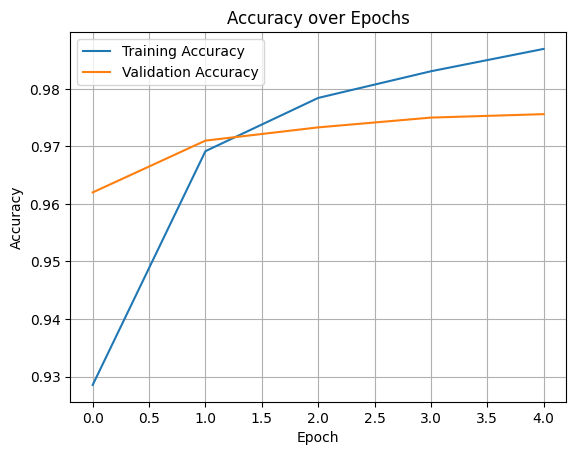

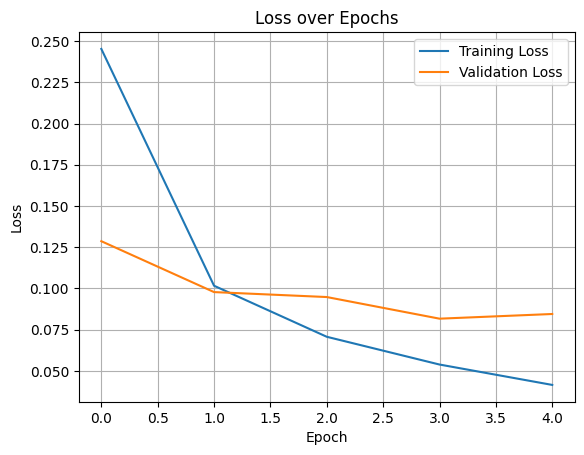

In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Step 3: Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model and store history
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

# Step 6: Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


6. Activity: Train and Test the MLP on MNIST
Use your from-scratch network or framework (Keras) to fit the data.

Evaluate the accuracy on the test set.

               Summary Table

Step	                     Description
Environment Setup	         Use Google Colab
Load Dataset	             Keras/TensorFlow      
                           or direct download
Data Preprocessing	       Normalize, flatten images
Backprop from Scratch      Write Python:        
                           forward pass, compute loss, backward pass
With Framework	           Use Keras/PyTorch for  
                           quick prototyping
Activity	                 Train on MNIST, report                     accuracy